In [1]:
import pandas as pd
import seaborn as sns
import altair as alt 
import tensorflow as tf
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#load data 
#data = pd.read_csv('/content/gdrive/MyDrive/AIA_Data_Encoding/v1/data/data_trash/data_test_01.csv')
data = pd.read_csv('/content/gdrive/MyDrive/AIA_Data_Encoding/v1/data/V1_c.csv')
pd.options.display.max_columns = None
print(data)

          area  clean_area  per_clean_area  steps      time  height  width  \
0     0.810000    0.258896        0.319624      6  1.986396    1.00   1.00   
1     0.785097    0.252604        0.321748      6  1.855302    1.00   1.00   
2     0.760788    0.246393        0.323866      6  1.818197    1.00   1.00   
3     0.737072    0.240276        0.325987      6  1.792320    1.00   1.00   
4     0.713946    0.234263        0.328125      6  1.745758    1.00   1.00   
...        ...         ...             ...    ...       ...     ...    ...   
4995  2.614227    0.853687        0.326554      7  2.685913    3.97   1.99   
4996  2.618085    0.863552        0.329841      7  2.744154    3.97   1.99   
4997  2.626248    0.874723        0.333070      8  2.781338    3.97   1.99   
4998  2.638689    0.887238        0.336242      7  3.356311    3.97   1.99   
4999  2.655400    0.901098        0.339346      7  3.167035    3.97   1.99   

          x_a   x_b      x_c  x_d  y_a     y_b   y_c     y_d   

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            5000 non-null   float64
 1   clean_area      5000 non-null   float64
 2   per_clean_area  5000 non-null   float64
 3   steps           5000 non-null   int64  
 4   time            5000 non-null   float64
 5   height          5000 non-null   float64
 6   width           5000 non-null   float64
 7   x_a             5000 non-null   float64
 8   x_b             5000 non-null   float64
 9   x_c             5000 non-null   float64
 10  x_d             5000 non-null   int64  
 11  y_a             5000 non-null   int64  
 12  y_b             5000 non-null   float64
 13  y_c             5000 non-null   float64
 14  y_d             5000 non-null   float64
 15  p_a             5000 non-null   float64
 16  p_b             5000 non-null   float64
 17  p_c             5000 non-null   f

In [ ]:
for colname, col in data.iteritems():
  print(colname, "min_val", col.min(), "max_val", col.max())

area min_val 0.2506463716 max_val 7.3143
clean_area min_val 0.1685822856 max_val 1.115136
per_clean_area min_val 0.1018792085 max_val 0.975464907
steps min_val 4 max_val 20
time min_val 0.791651526 max_val 9.982736226
height min_val 1.0 max_val 3.97
width min_val 1.0 max_val 1.99
x_a min_val 0.0 max_val 0.78008
x_b min_val 1.0 max_val 1.99
x_c min_val 0.608 max_val 1.99
x_d min_val 0 max_val 0
y_a min_val 0 max_val 0
y_b min_val 0.0 max_val 3.8906
y_c min_val 1.0 max_val 3.97
y_d min_val 0.02 max_val 3.97
p_a min_val 0.0 max_val 0.78008
p_b min_val 0.0 max_val 3.8906
p_c min_val 0.0 max_val 0.78008
p_d min_val 0.0 max_val 3.8906
bin min_val 0 max_val 1


In [ ]:
data_numerical = data[["per_clean_area", 'time', 'steps', 'p_a']]
#interesting slope.- area	clean_area	per_clean_area	curve_length	steps	height	width

#data_numerical = data.loc[:,'area':'width']
#sns.pairplot(data_numerical)

In [ ]:
#df.drop('a', inplace=True, axis=1)
#data_numerical.head()

data.head()

,area,clean_area,per_clean_area,steps,time,height,width,x_a,x_b,x_c,x_d,y_a,y_b,y_c,y_d,p_a,p_b,p_c,p_d,bin
0,0.810000,0.258896,0.319624,6,1.986396,1.0,1.0,0.000,1.0,1.000,0,0,0.00,1.0,1.00,0.000,0.00,0.000,0.00,1
1,0.785097,0.252604,0.321748,6,1.855302,1.0,1.0,0.008,1.0,0.992,0,0,0.02,1.0,0.98,0.008,0.02,0.008,0.02,1
2,0.760788,0.246393,0.323866,6,1.818197,1.0,1.0,0.016,1.0,0.984,0,0,0.04,1.0,0.96,0.016,0.04,0.016,0.04,1
3,0.737072,0.240276,0.325987,6,1.792320,1.0,1.0,0.024,1.0,0.976,0,0,0.06,1.0,0.94,0.024,0.06,0.024,0.06,1
4,0.713946,0.234263,0.328125,6,1.745758,1.0,1.0,0.032,1.0,0.968,0,0,0.08,1.0,0.92,0.032,0.08,0.032,0.08,1


In [ ]:
#normalize inputs 

#declare featuers 
X = data.iloc[:,:7]
#X.drop('steps', inplace=True, axis=1)

#X = data_numerical.iloc[:,:]

X.drop('time', inplace=True, axis=1)

#Load and instatiate a StandardScaler
from sklearn.preprocessing import StandardScaler
scalerX = StandardScaler()

#Apply the scaler to our X-feature
X_scaled = scalerX.fit_transform(X)

print(X_scaled.shape)

(5000, 6)


In [ ]:
X

,area,clean_area,per_clean_area,steps,height,width
0,0.810000,0.258896,0.319624,6,1.00,1.00
1,0.785097,0.252604,0.321748,6,1.00,1.00
2,0.760788,0.246393,0.323866,6,1.00,1.00
3,0.737072,0.240276,0.325987,6,1.00,1.00
4,0.713946,0.234263,0.328125,6,1.00,1.00
...,...,...,...,...,...,...
4995,2.614227,0.853687,0.326554,7,3.97,1.99
4996,2.618085,0.863552,0.329841,7,3.97,1.99
4997,2.626248,0.874723,0.333070,8,3.97,1.99
4998,2.638689,0.887238,0.336242,7,3.97,1.99


In [ ]:
#declare regression target 
y = data.loc[:, "time"].to_numpy()

y = y.reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scalerY = MinMaxScaler()

y_scaled = scalerY.fit_transform(y)

print(y_scaled.shape)
print(y_scaled)

(5000, 1)
[[0.12998951]
 [0.11572636]
 [0.11168929]
 ...
 [0.21648004]
 [0.27903773]
 [0.2584443 ]]


In [ ]:
#Split into train and test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.20, random_state = 42)

In [ ]:
#visualize our data 
print("TRAIN", "input", X_train.shape, "output", y_train.shape)
print("TEST", "input", X_test.shape, "output", y_test.shape)
print(X_test)
print(y_test)

TRAIN input (4000, 6) output (4000, 1)
TEST input (1000, 6) output (1000, 1)
[[ 0.62614906  0.12943487 -0.7407079   0.36082052 -0.67553359  0.27656329]
 [-0.53570882 -0.15352662  0.15942995 -0.34143818  0.05196412  0.27656329]
 [ 1.37147892  0.9373482  -0.77923637  0.00969117  0.12124962  0.27656329]
 ...
 [ 0.77385644  0.06312447 -0.83644633  1.41420856  0.50231985  0.27656329]
 [-0.39155367 -0.48280229 -0.28371149 -0.69256753  0.15589237  0.27656329]
 [-0.49857585 -0.77618497 -0.36606413 -0.69256753 -0.39839161  0.27656329]]
[[0.32445264]
 [0.10060031]
 [0.49271356]
 [0.22180474]
 [0.17703613]
 [0.1167579 ]
 [0.12487584]
 [0.278685  ]
 [0.38981974]
 [0.36167832]
 [0.36015694]
 [0.05445606]
 [0.13904925]
 [0.10185805]
 [0.33768303]
 [0.14872825]
 [0.10559268]
 [0.624883  ]
 [0.1160363 ]
 [0.08153191]
 [0.1030133 ]
 [0.14865841]
 [0.14466589]
 [0.14690992]
 [0.57899758]
 [0.17630343]
 [0.55513666]
 [0.0649823 ]
 [0.19975209]
 [0.06004029]
 [0.29542734]
 [0.08682218]
 [0.13015684]
 [0.6

In [ ]:
#Build model

#Instantiate a sequential model

tf.random.set_seed(2)
#tf.keras.models.save_model()
model = tf.keras.models.Sequential()
n_cols = X_scaled.shape[1]

#Add 2 dense alyers of 50 and 32 neurons each
model.add(tf.keras.layers.Dense(2, input_shape=(n_cols,),  activation='relu', ))

#model.add(tf.keras.layers.Dense(10, kernel_regularizer=tf.keras.regularizers.L2(0.001), activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
#model.add(tf.keras.layers.Dense(1, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
#model.add(tf.keras.layers.Dense(3, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))

#model.add(tf.keras.layers.Dropout(0.50))



#Add a dense a layer with a 1 value output

model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

#Incompatible shapes: [32,1] vs. [28,1]

#compile your module
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_132 (Dense)           (None, 2)                 14        
                                                                 
 dense_133 (Dense)           (None, 4)                 12        
                                                                 
 dense_134 (Dense)           (None, 4)                 20        
                                                                 
 dense_135 (Dense)           (None, 4)                 20        
                                                                 
 dense_136 (Dense)           (None, 2)                 10        
                                                                 
 dense_137 (Dense)           (None, 2)                 6         
                                                                 
 dense_138 (Dense)           (None, 4)               

In [ ]:
#Fit your model to the training data for 200 epochs
#we assign this to history variable so we can plot the trainin data 
history = model.fit(X_train, y_train, epochs=200, validation_split=0.20)

Epoch 1/200
100/100 [==============================] - 1s 4ms/step - loss: 0.0704 - val_loss: 0.0333
Epoch 2/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0275 - val_loss: 0.0204
Epoch 3/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0208 - val_loss: 0.0163
Epoch 4/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.0141
Epoch 5/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0143 - val_loss: 0.0119
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0120 - val_loss: 0.0099
Epoch 7/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0102 - val_loss: 0.0087
Epoch 8/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0091 - val_loss: 0.0080
Epoch 9/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.0076
Epoch 10/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0081 - val_lo

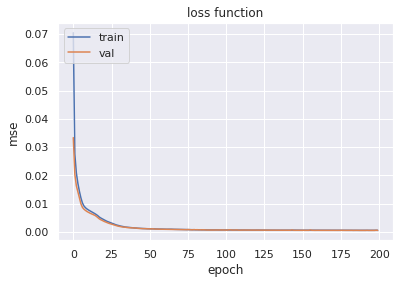

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss function')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

In [ ]:
#Evaluate your model accuracy on the test data 
loss_test = model.evaluate(X_test, y_test)

#print accuracy 
print('mse_test: ', loss_test)

32/32 [==============================] - 0s 2ms/step - loss: 5.2956e-04
mse_test:  0.0005295599694363773


In [ ]:
#Plot error

def plot_comparison(x_val, pred, truth, xlab, ylab):
  fig, ax1 = plt.subplots()
  ax1.plot(x_val, truth, color="red", label="truth", linestyle='None', marker="o", markersize=5)
  ax1.plot(x_val, pred, color="blue", label="pred", linestyle='None', marker="o", markersize=4, alpha=0.5)

  ax1.set_xlabel(xlab)
  ax1.set_ylabel(ylab)
  ax1.legend()
  fig.set_figheight(10)
  fig.set_figwidth(20)
  plt.title('Prediction Comparison')
  plt.show()

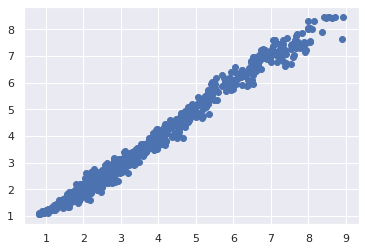

In [ ]:

y_pred = scalerY.inverse_transform(model.predict(X_test))
y_truth = scalerY.inverse_transform(y_test)

plt.scatter(y_truth, y_pred)

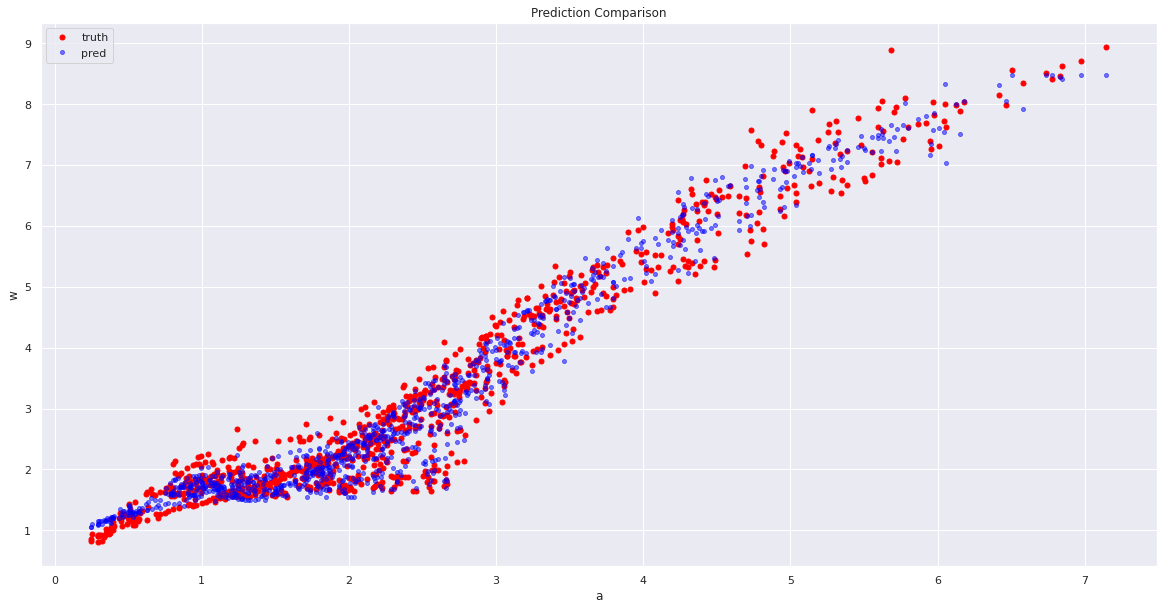

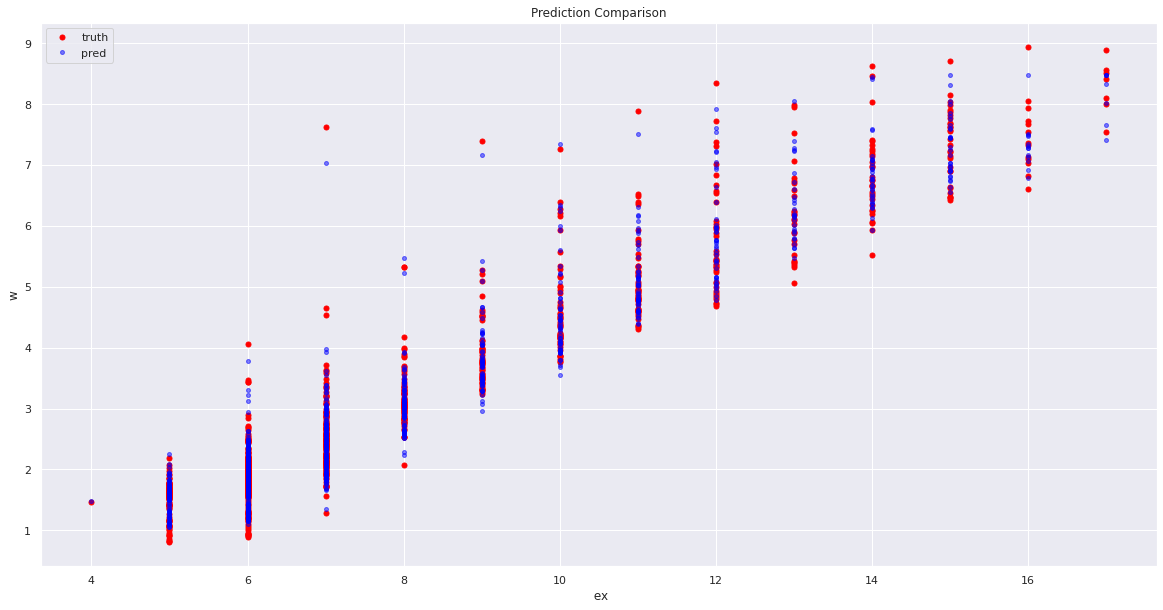

In [ ]:
##area	clean_area	per_clean_area	steps	height	width
area_test = (scalerX.inverse_transform(X_test)[:,0])
#print(a_test)

steps_test = (scalerX.inverse_transform(X_test)[:,3])

plot_comparison(area_test, y_pred, y_truth, "a", "w")
plot_comparison(steps_test, y_pred, y_truth, " ex", "w")

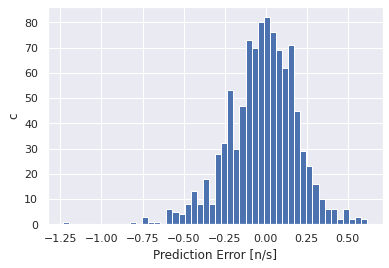

In [ ]:
error = y_pred - y_truth

plt.hist(error, bins=50)
plt.xlabel('Prediction Error [n/s]')
_ = plt.ylabel('c')